In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import scipy
from scipy import stats, integrate
from scipy.signal import find_peaks

In [2]:
import time
t0 = time.perf_counter()

# Global parameters

In [3]:
detect = ['index', 'DAQ', ''] 
detect[2] = 'SiPM' # SiPM
# detect[2] = 'PMT' # PMT

ch = 2

bias_voltage = np.array([52.1, 52.5, 52.8, 53.1, 53.5, 53.8, 54.1,54.5, 54.8, 55.1])
# 1pe signal value in mV for each bias volatage
single_pe = np.array([60., 70., 70., 85., 110., 120., 125., 155., 170., 200.]) + 60. # +mV of cortesia
single_pe = np.array([60., 70., 70., 85., 110., 120., 125., 155., 170., 200.])*3/2 # +mV of cortesia

height_min = 50. # height threshold to which consider a peak
height_min = 55. # height threshold to which consider a peak
height_min = 60. # height threshold to which consider a peak
dist_min = 30 # min distance between peaks required
dist_min = 25 # min distance between peaks required
dist_min = 20 # min distance between peaks required
# dist_min = 15 # min distance between peaks required
# dist_min = 10 # min distance between peaks required
dif_min = None # min height difference between the peak point and their neighbours 

# Data

In [4]:
filename = []

path = '/home/investigator/mariandbt/python/data/'
path = path + '20230322/'

filename.append(os.path.join(path, 'dark_rate_bias_52.1V_dig2-192.168.0.254-32.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_52.5V_dig2-192.168.0.254-31.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_52.8V_dig2-192.168.0.254-30.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_53.1V_dig2-192.168.0.254-28.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_53.5V_dig2-192.168.0.254-20.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_53.8V_dig2-192.168.0.254-19.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_54.1V_dig2-192.168.0.254-06.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_54.5V_dig2-192.168.0.254-05.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_54.8V_dig2-192.168.0.254-04.txt')) 
filename.append(os.path.join(path, 'dark_rate_bias_55.1V_dig2-192.168.0.254-03.txt')) 


# Fixed bias voltage waveform

### Data (1 file)

In [5]:
file = 9
file = 4

In [6]:
data = []
time_bin = -1.
with open(filename[file],'r', encoding='ascii') as fp:
    for i, line in enumerate(fp):
        if (time_bin < 0.) & (any(c == '=' for c in line)):
            print('Time bin = ', line.split(' = ')[:][1])
            time_bin = float(line.split(' = ')[:][1].split(' ')[0])
        if any(c.isalpha() for c in line) == False:
            data.append(np.asarray(line.split('\t')[:-1], dtype=float))
fp.close()

waveform = np.array(data)


n_points = int(waveform[:, 0].max() + 1)
n_frames = int(len(waveform)/n_points) 

waveform[:, 0] = waveform[:, 0]*time_bin


Time bin =  0.008 us



### RAW Waveform peak identification

In [10]:
frame_ref = int(n_frames/2); 
frame_ref = 2310; 
frame_ref = 1989; 
frame_ref = 865; 
# frame_ref = n_frames - 1; 
# frame_ref = 1; 

frame = frame_ref;
# print('frame = ', frame)

n_peaks =  1
peaks_mV =  [96.6201]
cross_talk =  0.0


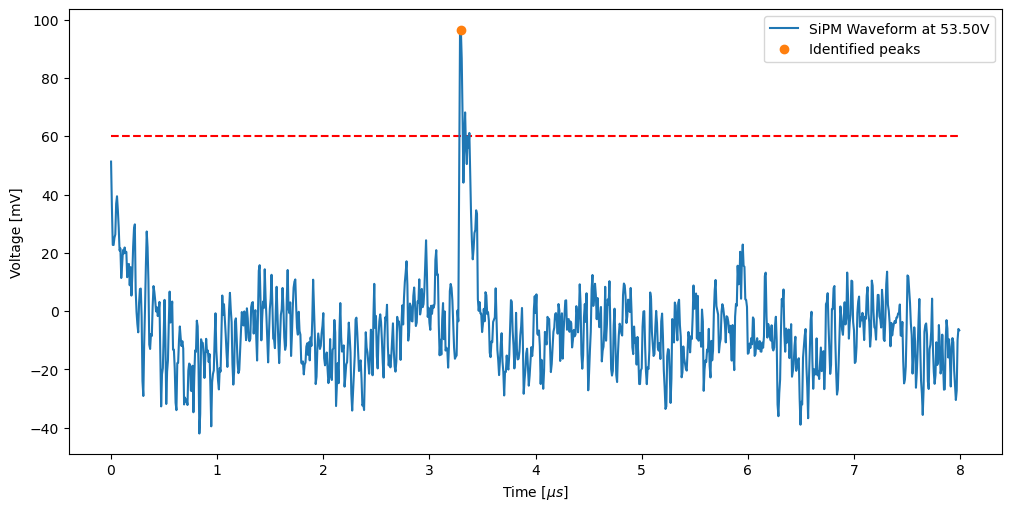

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), constrained_layout=True)

wave = waveform[frame*n_points: (frame + 1)*n_points].copy()
x_ax = wave[:, 0]

peaks = []

peaks, _ = find_peaks(wave[:, ch], height=height_min, threshold=dif_min, distance=dist_min)

n_peaks = len(peaks)
print('n_peaks = ', n_peaks)
print('peaks_mV = ', wave[:, ch][peaks])

mask = wave[:, ch][peaks]>single_pe[file]
masked_peaks = len(wave[peaks][mask]) 
cross_talk = 0 if (n_peaks==0) else (masked_peaks/n_peaks) # to avoid dividing by 0
print('cross_talk = ', cross_talk)

#_________plot_settings_________________________________________________
ax.plot(x_ax, height_min*np.ones(len(x_ax)), '--r')
ax.plot(x_ax, wave[:, ch], label = detect[ch] + ' Waveform at %.2fV'%(bias_voltage[file]))
ax.plot(x_ax[peaks], wave[:, ch][peaks], 'o', label = 'Identified peaks')

ax.set_ylabel('Voltage [mV]');
ax.set_xlabel('Time [$\mu s$]');
ax.legend(loc = 'best')


### Dark rate count

n_peaks =  17679
cross_talk =  0.15266700605237854
dark_rate =  [1003121.1997826599]


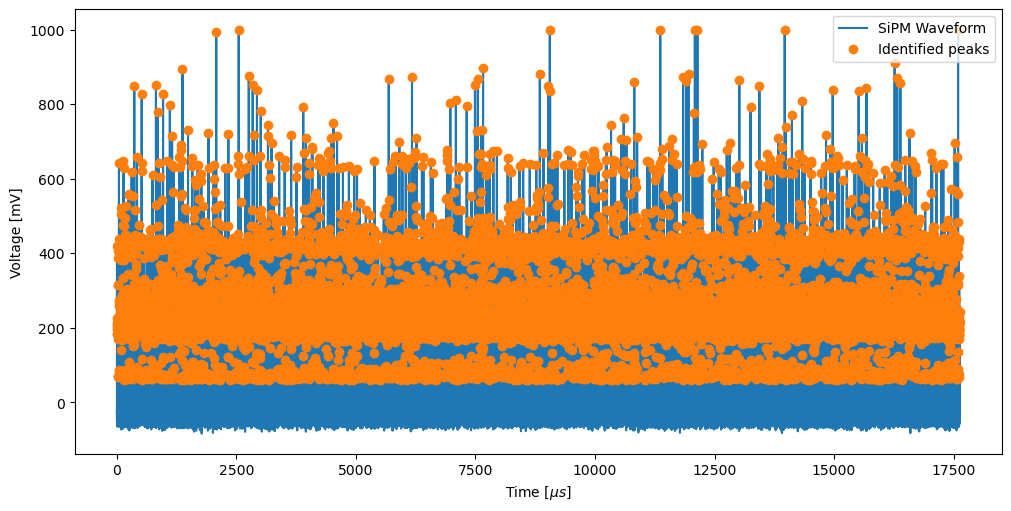

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), constrained_layout=True)

wave = waveform.copy()
x_ax = np.array(range(len(wave)))*time_bin

dark_rate = []
peaks = []

peaks, _ = find_peaks(wave[:, ch], height=height_min, threshold=dif_min, distance=dist_min)

n_peaks = len(peaks)
print('n_peaks = ', n_peaks)

mask = wave[:, ch][peaks]>single_pe[file]
masked_peaks = len(wave[peaks][mask]) 
cross_talk = 0 if (n_peaks==0) else (masked_peaks/n_peaks) # to avoid dividing by 0
print('cross_talk = ', cross_talk)

dark_rate.append(n_peaks/(x_ax.max()*1e-6))
print('dark_rate = ', dark_rate)


#_________plot_settings_________________________________________________
ax.plot(x_ax, height_min*np.ones(len(x_ax)), '--r')
ax.plot(x_ax, wave[:, ch], label = detect[ch] + ' Waveform')
ax.plot(x_ax[peaks], wave[:, ch][peaks], 'o', label = 'Identified peaks')

ax.set_ylabel('Voltage [mV]');
ax.set_xlabel('Time [$\mu s$]');
ax.legend(loc = 'best')


In [10]:
mask = wave[:, ch][peaks]>single_pe[file]
len(wave[:, ch][peaks][mask]), n_peaks
# wave[:, ch][peaks], 

(2699, 17679)

# All bias voltages waveform

### Data (all files)

In [11]:
dark_rate = []
dark_rate_err = []

cross_talk = []
cross_talk_err = []


for ii in range(len(filename)):
    data = []
    time_bin = -1.
    with open(filename[ii],'r', encoding='ascii') as fp:
        for i, line in enumerate(fp):
            if (time_bin < 0.) & (any(c == '=' for c in line)):
    #                 print('Time bin = ', line.split(' = ')[:][1])
                time_bin = float(line.split(' = ')[:][1].split(' ')[0])
            if any(c.isalpha() for c in line) == False:
                data.append(np.asarray(line.split('\t')[:-1], dtype=float))
    fp.close()

    waveform = np.array(data)

    n_points = int(waveform[:, 0].max() + 1)
    n_frames = int(len(waveform)/n_points) 

    waveform[:, 0] = waveform[:, 0]*time_bin
    
    wave = waveform[:, ch].copy()
    x_ax = np.array(range(len(wave)))*time_bin

    peaks = []
    
    peaks, _ = find_peaks(wave, height=height_min, threshold=dif_min, distance=dist_min)

    n_peaks = len(peaks)
#     print('n_peaks = ', n_peaks)

    n_err = np.sqrt(n_peaks) 
    """
    The counting of peaks follows a Poisson distribution, therefore we take as uncertainty in n_peaks
    the uncertainty of a Poisson distribution with mean=n_peaks and size=n_all_points_considered.
    According to the theory, for a Poisson distribution uncertainty=sqrt(mean)
    """
    t_err = time_bin*1e-6
    t_tot = x_ax.max()*1e-6
    
    dr = n_peaks/t_tot
    dr_err = np.sqrt( (n_peaks*t_err/(t_tot**2))**2 + (n_err/t_tot)**2 )

    dark_rate.append(dr)
    dark_rate_err.append(dr_err)
#     print('dark_rate = ', dark_rate)
    
    mask = wave[peaks]>single_pe[ii]
    masked_peaks = len(wave[peaks][mask]) 
    masked_peaks_err = np.sqrt(masked_peaks)
    
    ct = 0 if (n_peaks==0) else (masked_peaks/n_peaks) # to avoid dividing by 0
    ct_err = 0 if (masked_peaks==0) else (np.sqrt( (masked_peaks*n_err/(n_peaks**2))**2 + (masked_peaks_err/n_peaks)**2 ))

    cross_talk.append(ct)
    cross_talk_err.append(ct_err)
    
    
    print('dark_rate[%.2f] = '%(bias_voltage[ii]), dark_rate[ii], 
          ' ; cross_talk[%.2f] = '%(bias_voltage[ii]), cross_talk[ii])
    

dark_rate[52.10] =  0.0  ; cross_talk[52.10] =  0
dark_rate[52.50] =  30748.91791141323  ; cross_talk[52.50] =  0.011851851851851851
dark_rate[52.80] =  232265.92020176316  ; cross_talk[52.80] =  0.0363232023721275
dark_rate[53.10] =  382035.0976264221  ; cross_talk[53.10] =  0.04910528506034124
dark_rate[53.50] =  515505.7415062623  ; cross_talk[53.50] =  0.06427688504326329
dark_rate[53.80] =  591911.9796339795  ; cross_talk[53.80] =  0.10259949390384172
dark_rate[54.10] =  726525.2661155813  ; cross_talk[54.10] =  0.14310141509433963
dark_rate[54.50] =  836863.1322575457  ; cross_talk[54.50] =  0.14723995073340052
dark_rate[54.80] =  915288.0463663206  ; cross_talk[54.80] =  0.16389316897791473
dark_rate[55.10] =  1003121.1997826599  ; cross_talk[55.10] =  0.15266700605237854


In [12]:
cross_talk_err

[0,
 0.0042150204505755975,
 0.0026412146989117707,
 0.0023150841126686104,
 0.002654543473005294,
 0.0029452763913567583,
 0.0031056422149052043,
 0.0030752110059698488,
 0.0031300697125660427,
 0.0031549732220702066]

In [13]:
n_peaks, x_ax.max(), dark_rate_err[-1], dr_err

(17679, 17623.992000000002, 7544.397486251843, 7544.397486251843)

In [14]:
np.sqrt( (n_peaks*t_err/(t_tot**2))**2 + (n_err/t_tot)**2 )

(n_peaks*t_err/(t_tot**2))**2 + (n_err/t_tot)**2

56917933.43056312

In [15]:
wave = waveform[:, ch].copy()
x_ax = np.array(range(len(wave)))*time_bin
x_ax.max()
wave

array([-21.149  , -25.9098 , -24.9027 , ...,   4.48615,   7.96521,
         3.84527])

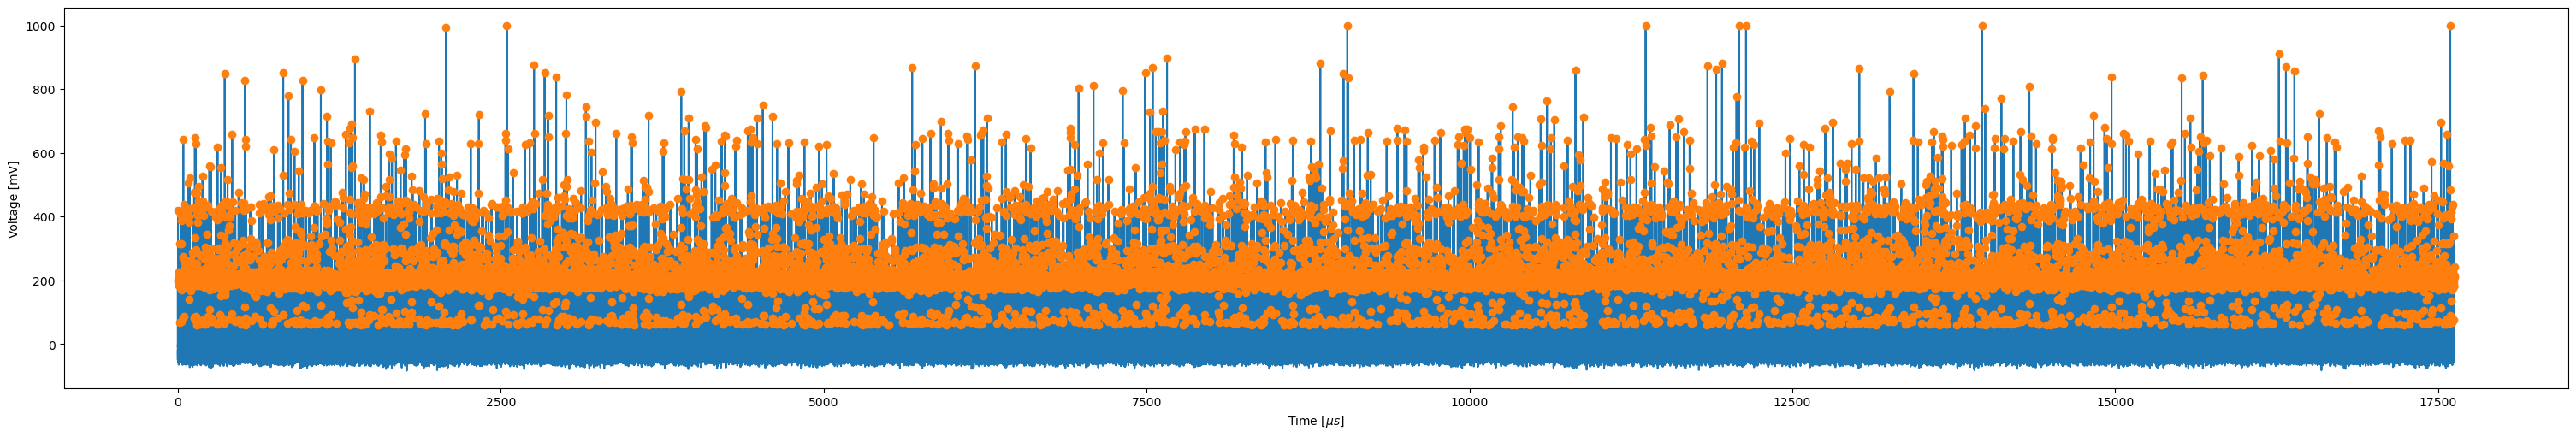

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,5), constrained_layout=True)

#_________plot_settings_________________________________________________
ax.plot(x_ax, height_min*np.ones(len(x_ax)), '--r')
ax.plot(x_ax, wave, label = detect[ch])
ax.plot(x_ax[peaks], wave[peaks], 'o')

ax.set_ylabel('Voltage [mV]');
ax.set_xlabel('Time [$\mu s$]');

In [17]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), constrained_layout=True)

# poiss = np.random.poisson(lam=dark_rate[ii], size=len(x_ax))

# #_________plot_settings_________________________________________________
# events, bins, bars = ax.hist(poiss, 50, density=True, label='Poisson distribution', histtype='step')

# xx_ax = np.linspace(bins.min(), bins.max(), len(bins)-1)
# ax.plot(xx_ax, stats.poisson.pmf(np.arange(len(xx_ax)) + int(dark_rate[ii]), dark_rate[ii]), 
#         '-', label='$\mu$ = %.2f, $\sigma$ = %.2f'%(poiss.mean(), poiss.std()))

# ax.legend()
# print('mean = ', dark_rate[ii], 'sigma = ', poiss.std())

In [18]:
# stats.poisson.pmf(np.arange(len(xx_ax)) + int(xx_ax.min()), mu = dark_rate[ii]), dark_rate[ii]
# np.arange(len(xx_ax)) + int(xx_ax.min())

# Dark rate vs bias Voltage

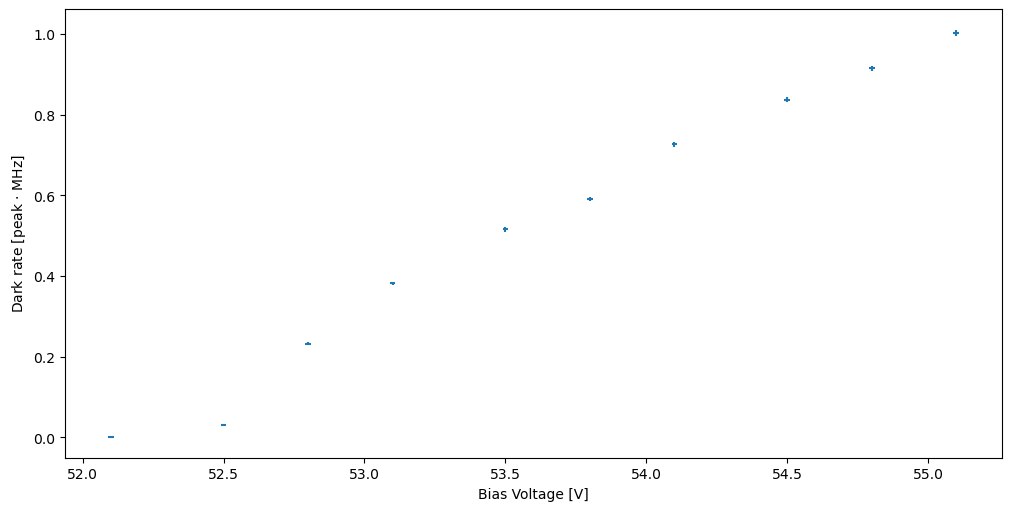

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), constrained_layout=True)

x_ax = bias_voltage
y_ax = np.array(dark_rate)*1e-6

#_________plot_settings_________________________________________________
y_err = np.array(dark_rate_err)*1e-6
x_err = 0.01

ax.errorbar(x_ax, y_ax, y_err, x_err, 'o', markersize=0)
# ax.errorbar(x_ax[-3:], y_ax[-3:], y_err[-3:], x_err, 'o', markersize=0)

ax.set_xlabel('Bias Voltage [V]');
# ax.set_ylabel('Dark rate [peak/s]');
ax.set_ylabel('Dark rate [peak $ \cdot $ MHz]');

# Cross talk vs bias Voltage

cross_talk[52.10] = 0.00 %
cross_talk[52.50] = 1.19 %
cross_talk[52.80] = 3.63 %
cross_talk[53.10] = 4.91 %
cross_talk[53.50] = 6.43 %
cross_talk[53.80] = 10.26 %
cross_talk[54.10] = 14.31 %
cross_talk[54.50] = 14.72 %
cross_talk[54.80] = 16.39 %
cross_talk[55.10] = 15.27 %


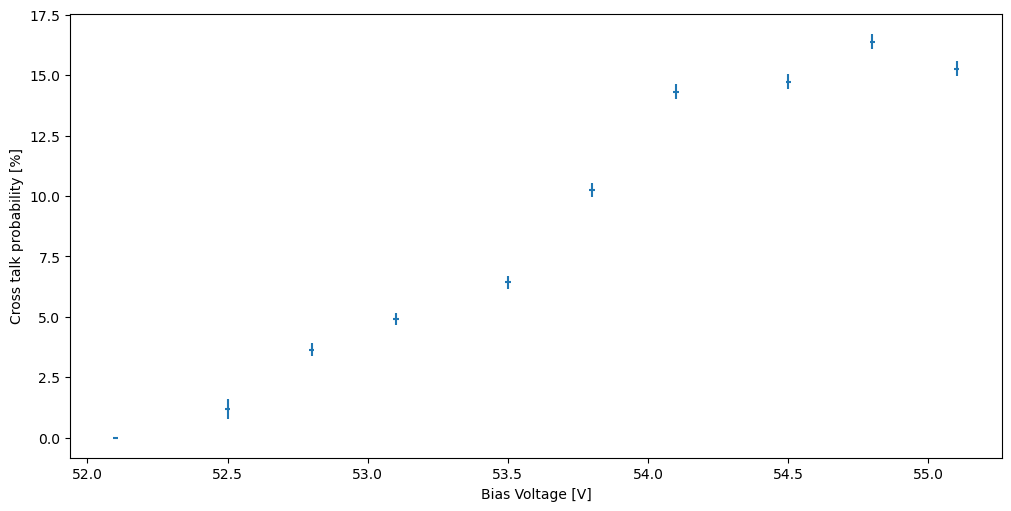

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), constrained_layout=True)

x_ax = bias_voltage
y_ax = np.array(cross_talk)*100

#_________plot_settings_________________________________________________
y_err = np.array(cross_talk_err)*100
# y_err = 0.
x_err = 0.01

ax.errorbar(x_ax, y_ax, y_err, x_err, 'o', markersize=0)
# ax.errorbar(x_ax[-3:], y_ax[-3:], y_err[-3:], x_err, 'o', markersize=0)

ax.set_xlabel('Bias Voltage [V]');
# ax.set_ylabel('Dark rate [peak/s]');
ax.set_ylabel('Cross talk probability [%]');

for ii in range(len(cross_talk)):
    print('cross_talk[%.2f] = %.2f %%'%(bias_voltage[ii], cross_talk[ii]*100))


# Timer

In [21]:
tf = time.perf_counter()
print('Code timer: %.2f'%(tf-t0))

Code timer: 208.08
